In [1]:
# House Price Prediction Using Machine Learning

# Project Overview
# This notebook explores various regression techniques to predict house prices using the California Housing dataset.
# It includes preprocessing, model training, evaluation, and optimization using techniques like Ridge, Lasso, and Random Forest.
# The goal is to achieve high R² and low MSE while maintaining model interpretability.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# ## 1. Load Dataset and Perform EDA

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target
print(df.head())
print(df.describe())

# ## 2. Data Preprocessing & Scaling

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[data.feature_names])
scaled_df = pd.DataFrame(scaled_features, columns=data.feature_names)


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%       

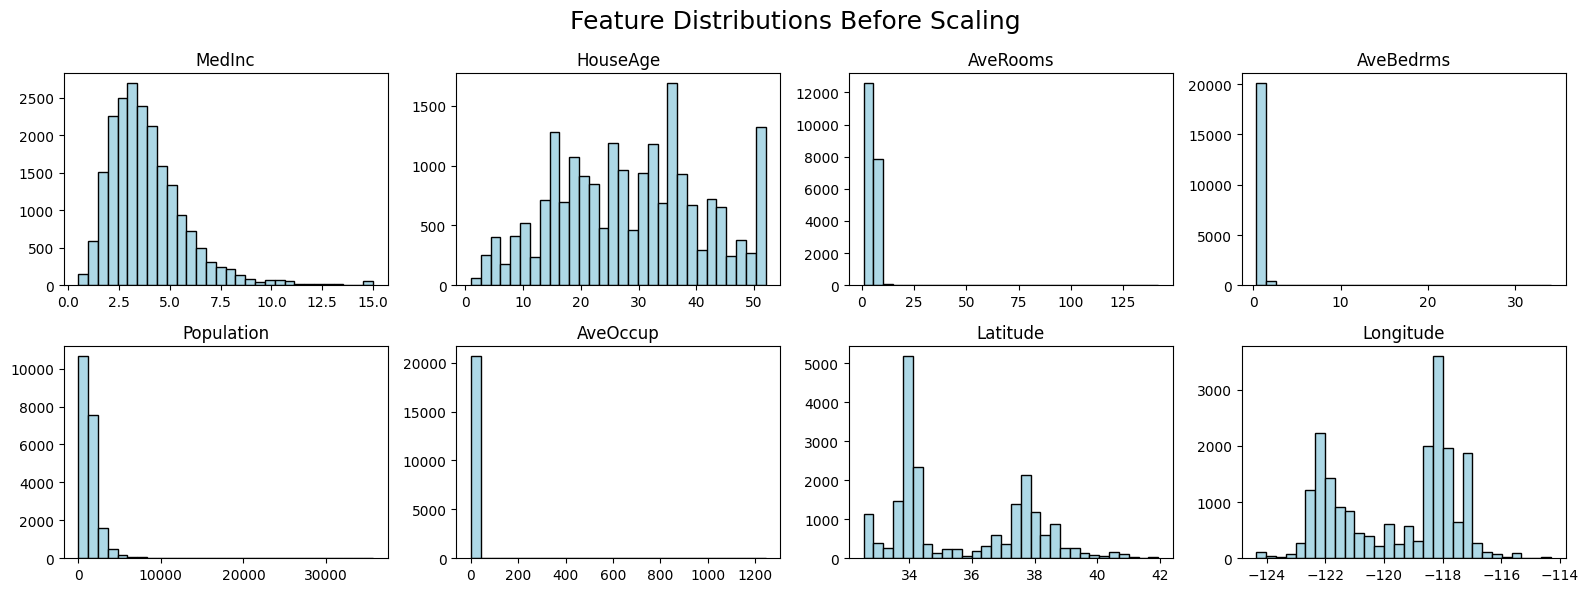

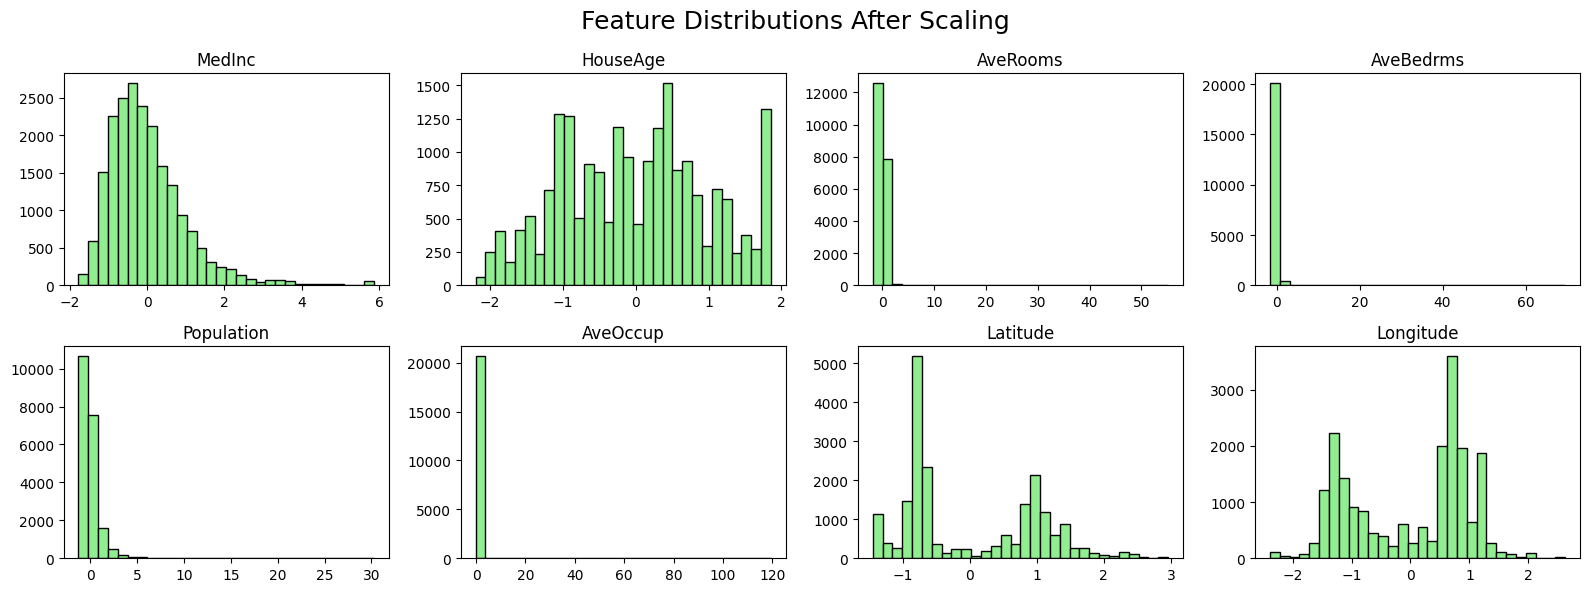

In [3]:
# ##  Histogram Before and After Scaling

plt.figure(figsize=(16, 6))
plt.suptitle("Feature Distributions Before Scaling", fontsize=18)
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 4, i+1)
    plt.hist(df[column], bins=30, color='lightblue', edgecolor='black')
    plt.title(column)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 6))
plt.suptitle("Feature Distributions After Scaling", fontsize=18)
for i, column in enumerate(scaled_df.columns):
    plt.subplot(2, 4, i+1)
    plt.hist(scaled_df[column], bins=30, color='lightgreen', edgecolor='black')
    plt.title(column)
plt.tight_layout()
plt.show()


In [4]:
# ##  3. Linear Regression

X = scaled_df
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("\nLinear Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))



Linear Regression Results:
MSE: 0.5558915986952444
R²: 0.5757877060324508


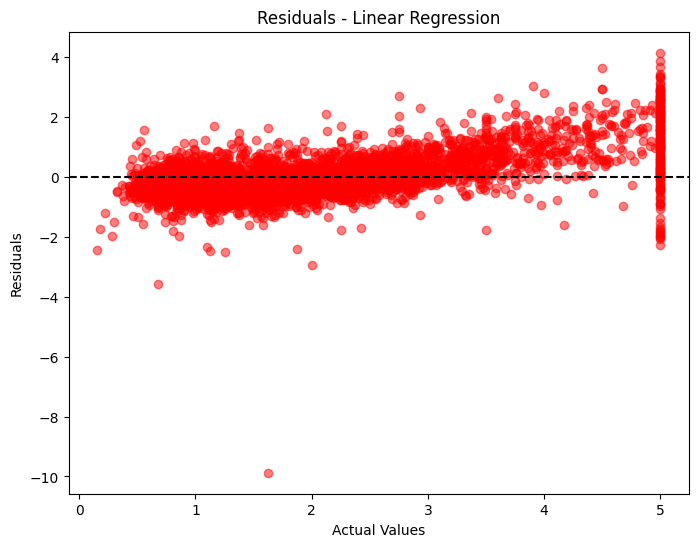

In [5]:
# ##  Residual Plot - Linear Regression

residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, color='red', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals - Linear Regression")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()


In [6]:
# ##  4. Polynomial Regression

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

print("\nPolynomial Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("R²:", r2_score(y_test, y_pred_poly))



Polynomial Regression Results:
MSE: 0.46430152383011997
R²: 0.6456819729261921


In [7]:
# ##  5. Regularization - Ridge & Lasso

alphas = [0.01, 0.1, 1, 10, 100]

ridge_cv = GridSearchCV(Ridge(), {'alpha': alphas}, cv=5)
ridge_cv.fit(X_train, y_train)
best_ridge = ridge_cv.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("\nRidge Regression:")
print("Best Alpha:", ridge_cv.best_params_['alpha'])
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R²:", r2_score(y_test, y_pred_ridge))

print("\nLasso Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R²:", r2_score(y_test, y_pred_lasso))



Ridge Regression:
Best Alpha: 0.1
MSE: 0.5558875470324992
R²: 0.5757907979394907

Lasso Regression:
MSE: 0.6795515190149223
R²: 0.4814202815313765


In [8]:
# ##  6. Random Forest Regressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))




Random Forest:
MSE: 0.25549776668540763
R²: 0.805024407701793


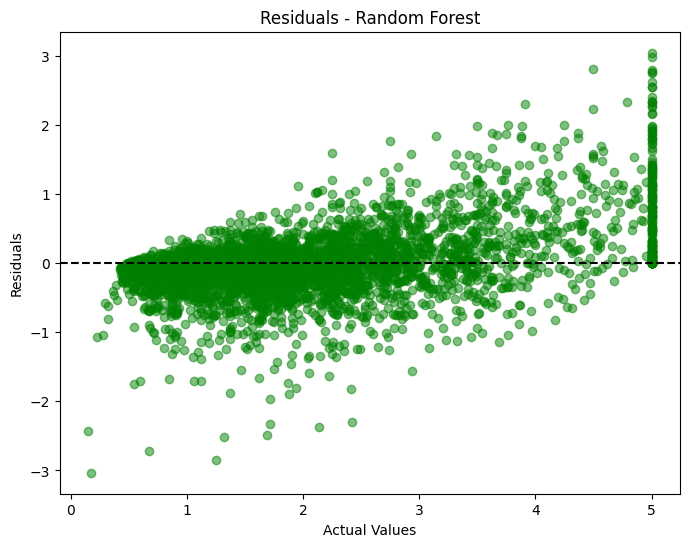

In [9]:
# ##  Residual Plot - Random Forest

rf_residuals = y_test - y_pred_rf
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_residuals, alpha=0.5, color='green')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals - Random Forest")
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.show()


In [10]:
# ##  7. Model Comparison Table

results = pd.DataFrame({
    'Model': ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression', 'Random Forest'],
    'MSE': [
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_pred_poly),
        mean_squared_error(y_test, y_pred_ridge),
        mean_squared_error(y_test, y_pred_lasso),
        mean_squared_error(y_test, y_pred_rf)
    ],
    'R² Score': [
        r2_score(y_test, y_pred),
        r2_score(y_test, y_pred_poly),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso),
        r2_score(y_test, y_pred_rf)
    ]
})

print("\nModel Comparison Summary:")
print(results)



Model Comparison Summary:
                   Model       MSE  R² Score
0      Linear Regression  0.555892  0.575788
1  Polynomial Regression  0.464302  0.645682
2       Ridge Regression  0.555888  0.575791
3       Lasso Regression  0.679552  0.481420
4          Random Forest  0.255498  0.805024


In [11]:
# ## 8. Conclusion

print("\nConclusion:")
print("Random Forest performed the best with R² = {:.2f}".format(r2_score(y_test, y_pred_rf)))




Conclusion:
Random Forest performed the best with R² = 0.81
